# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [33]:
# importação das bibliotecas pandas e pyplot do matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# transformando o arquivo .csv em um dataframe
df = pd.read_csv('SINASC_RO_2019.csv')
df.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [35]:
# selecionando a coluna APGAR5 e criando categorias
# criando função para categorizar
def categoria_apgar5(apgar_score):
    if 0 <= apgar_score <= 3:
        return 'asfixia grave'
    elif 4 <= apgar_score <= 5:
        return 'asfixia moderada'
    elif 6 <= apgar_score <= 7:
        return 'asfixia leve'
    elif 8 <= apgar_score <= 10:
        return 'normal'
    else:
        return 'valor inválido'
    
# aplicando a função na coluna Categoria    
df['Categoria'] = df['APGAR5'].apply(categoria_apgar5) 

# verificando a quantidade de cada classificação
df['Categoria'].value_counts()


normal              26463
asfixia leve          320
valor inválido        103
asfixia grave          74
asfixia moderada       68
Name: Categoria, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

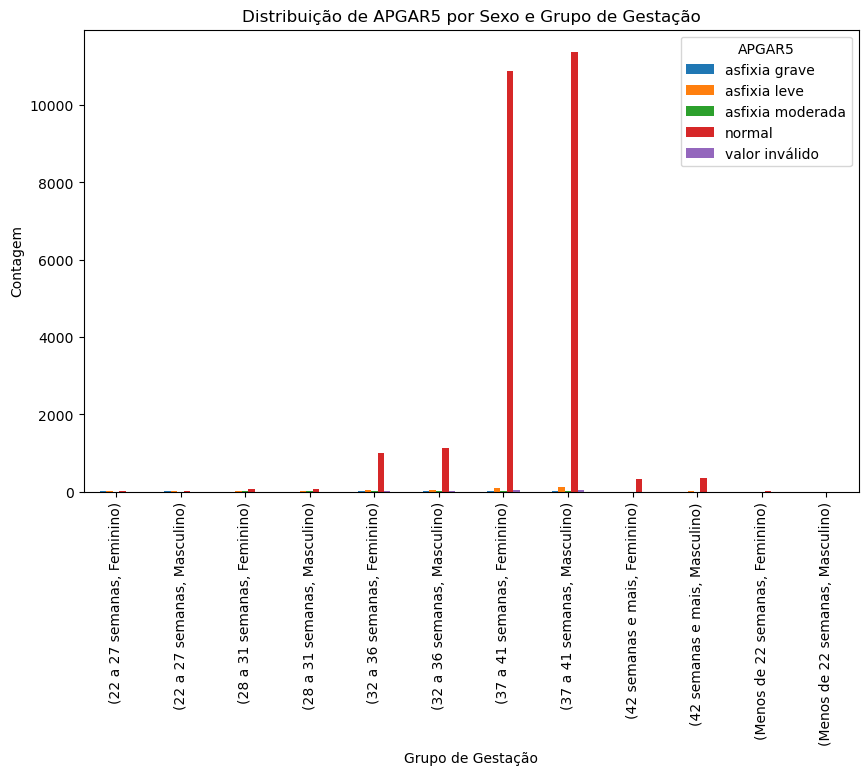

In [32]:
# criando a comparação bivariada
# Criando um gráfico de barras comparando a distribuição de APGAR5 por sexo para cada grupo de GESTACAO
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['GESTACAO', 'SEXO', 'Categoria']).size().unstack().plot(kind='bar', ax=ax)

# Configurações do gráfico
plt.title('Distribuição de APGAR5 por Sexo e Grupo de Gestação')
plt.xlabel('Grupo de Gestação')
plt.ylabel('Contagem')
plt.legend(title='APGAR5')

# Exibindo o gráfico
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [40]:
# Criando a tabela cruzada
cross_table = pd.crosstab(df['GESTACAO'], df['Categoria'])

# Exibindo a tabela cruzada
cross_table

Categoria,asfixia grave,asfixia leve,asfixia moderada,normal,valor inválido
GESTACAO,,,,,
22 a 27 semanas,21,12,1,51,1
28 a 31 semanas,3,18,12,129,3
32 a 36 semanas,8,73,19,2134,15
37 a 41 semanas,33,196,28,22266,66
42 semanas e mais,1,6,1,690,2
Menos de 22 semanas,2,1,0,4,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [47]:
# Calculando os percentuais de linha
percentual_tabelacruzada = cross_table.apply(lambda linha: linha / linha.sum(), axis=1)

# Exibindo os percentuais de linha
percentual_tabelacruzada
    

Categoria,asfixia grave,asfixia leve,asfixia moderada,normal,valor inválido
GESTACAO,,,,,
22 a 27 semanas,0.244186,0.139535,0.011628,0.593023,0.011628
28 a 31 semanas,0.018182,0.109091,0.072727,0.781818,0.018182
32 a 36 semanas,0.003557,0.032459,0.008448,0.948866,0.006670
37 a 41 semanas,0.001461,0.008677,0.001240,0.985701,0.002922
42 semanas e mais,0.001429,0.008571,0.001429,0.985714,0.002857
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.